# Case-based Explanations

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from mpl_toolkits.axes_grid1 import ImageGrid

In [2]:
data_loc="/nas-ctm01/datasets/public/BIOMETRICS/pornography-2k-db/data-processed/even-20"

In [3]:
explanations_path="../../results/even-20/data-aug/pornography-2k/explanations/vgg19_freeze_False_epochs_50_batch_16_optim_sgd_aug_True_split_10_20/case_explanations.csv"
explanations_df = pd.read_csv(explanations_path)
explanations_df

,frame,cosine_case_1,cosine_case_2,cosine_case_3,cosine_score_1,cosine_score_2,cosine_score_3,euclidean_case_1,euclidean_case_2,euclidean_case_3,euclidean_score_1,euclidean_score_2,euclidean_score_3
0,vPorn000601#0.jpg,vPorn000180#15.jpg,vPorn000790#14.jpg,vPorn000194#11.jpg,0.304270,0.249176,0.217908,vNonPorn000240#6.jpg,vPorn000180#15.jpg,vPorn000174#0.jpg,49.368020,50.000774,52.216267
1,vPorn000601#1.jpg,vPorn000180#15.jpg,vPorn000790#14.jpg,vPorn000194#11.jpg,0.310704,0.255132,0.250116,vNonPorn000240#6.jpg,vPorn000180#15.jpg,vPorn000174#0.jpg,48.834824,49.401096,51.423958
2,vPorn000601#2.jpg,vPorn000790#14.jpg,vPorn000180#15.jpg,vPorn000194#11.jpg,0.296298,0.281821,0.260603,vNonPorn000240#6.jpg,vPorn000180#15.jpg,vPorn000174#0.jpg,49.287025,50.883312,51.669914
3,vPorn000601#3.jpg,vPorn000790#14.jpg,vPorn000180#15.jpg,vPorn000194#11.jpg,0.296842,0.296041,0.266858,vPorn000180#15.jpg,vNonPorn000240#6.jpg,vPorn000174#0.jpg,54.513992,54.950500,56.890255
4,vPorn000601#4.jpg,vPorn000180#15.jpg,vPorn000790#14.jpg,vPorn000194#11.jpg,0.318804,0.271317,0.259128,vPorn000180#15.jpg,vNonPorn000240#6.jpg,vPorn000174#0.jpg,57.853443,60.460228,61.617157
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7995,vNonPorn000033#15.jpg,vNonPorn000240#6.jpg,vPorn000174#0.jpg,vNonPorn000383#0.jpg,0.124735,0.123021,0.122018,vNonPorn000240#6.jpg,vPorn000174#0.jpg,vPorn000180#15.jpg,45.415363,48.771550,53.022800
7996,vNonPorn000033#16.jpg,vNonPorn000066#14.jpg,vNonPorn000240#6.jpg,vNonPorn000197#11.jpg,0.194072,0.177577,0.160968,vNonPorn000240#6.jpg,vPorn000174#0.jpg,vPorn000180#15.jpg,36.822304,41.570385,48.003345
7997,vNonPorn000033#17.jpg,vPorn000194#11.jpg,vPorn000174#0.jpg,vPorn000090#9.jpg,0.180890,0.151078,0.137391,vNonPorn000240#6.jpg,vPorn000174#0.jpg,vPorn000194#11.jpg,45.350403,47.727245,53.117325
7998,vNonPorn000033#18.jpg,vNonPorn000024#0.jpg,vNonPorn000383#0.jpg,vNonPorn000240#6.jpg,0.179896,0.156523,0.138119,vNonPorn000240#6.jpg,vPorn000174#0.jpg,vNonPorn000383#0.jpg,49.452442,53.011673,55.959854


In [4]:
K = 3
def get_cases(row):
    cases = { "cos": [], "euc": [] }
    for i in range(1,K+1):
        cases["cos"].append((row[f"cosine_case_{i}"], row[f"cosine_score_{i}"]))
        cases["euc"].append((row[f"euclidean_case_{i}"], row[f"euclidean_score_{i}"]))
    return cases
    
def display_cases(cases, criterion):
    fig = plt.figure(figsize=(10,3.5))
    fig.suptitle(f"Criterion: {'cosine similariy' if criterion == 'cos' else 'euclidean distance'}", fontsize=10)
    
    grid = ImageGrid(
        fig, 111,  
        nrows_ncols=(1,3),
        axes_pad=0.1
    )
    
    for ax, (case, score) in zip(grid, cases):
        img = mpimg.imread(f"{data_loc}/{case}")
        ax.imshow(img)
        ax.set_title(f"{case}\nscore: {score}", fontsize=8)
        ax.set_axis_off()

    plt.show()

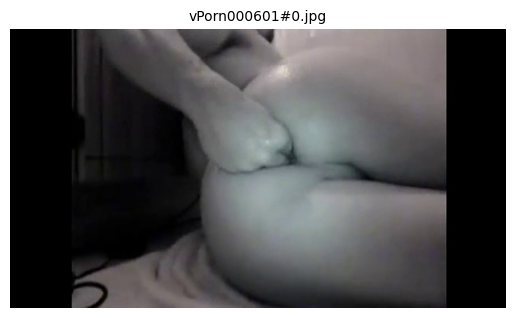

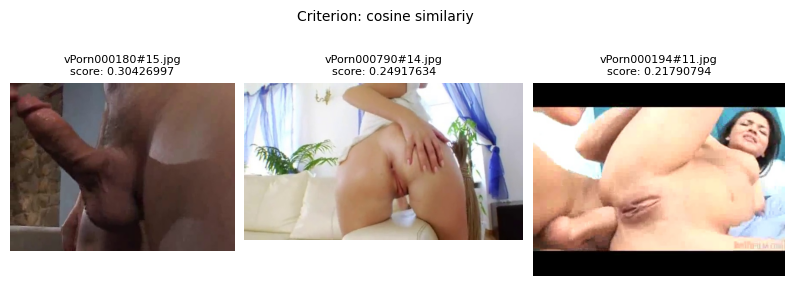

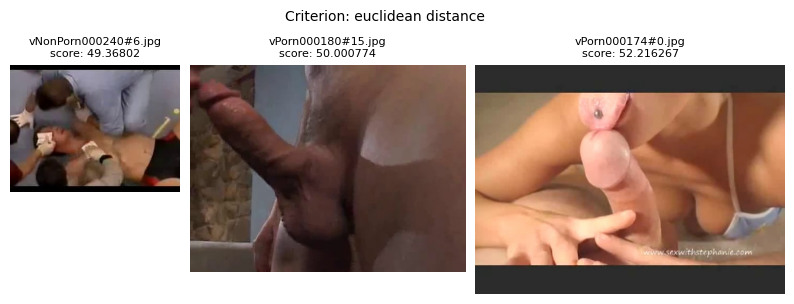

In [5]:
i = 1
for _, row in explanations_df.iterrows():
    if i == 0: break # temporary condition
    i -= 1
    
    img = mpimg.imread(f"{data_loc}/{row['frame']}")
    plt.imshow(img)
    plt.title(f"{row['frame']}", fontsize=10)
    plt.axis("off")

    cases = get_cases(row)
    display_cases(cases["cos"], "cos")
    display_cases(cases["euc"], "euc")